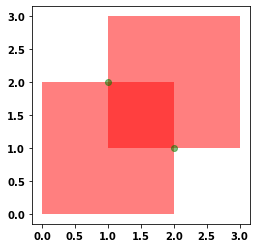

In [56]:
from shapely.geometry import Polygon,Point, LineString
from shapely.ops import split
from shapely.affinity import scale
import geopandas as gpd
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                               Polygon([(1,1), (3,1), (3,3), (1,3)])])
 
polys2 = gpd.GeoSeries([Point([(1,2)]),Point([(2,1)]) ])
                                  
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

ax = df1.plot(color='red', alpha = 0.5)
df2.plot(ax=ax, color='green', alpha=0.5);

In [7]:
geom1 = df1.geometry[0]
geom2 = df1.geometry[1]

points = geom1.boundary.intersection(geom2.boundary) # multipoint
#points = list(points) # point list

print(points)
#[<shapely.geometry.point.Point at ...>,
# <shapely.geometry.point.Point at ...>]

MULTIPOINT (2 1, 1 2)


In [9]:
line = LineString(points)

C:\Users\CULLEYJ\AppData\Local\Temp\ipykernel_28060\3057437666.py:1: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  line = LineString(points)


C:\Users\CULLEYJ\AppData\Local\Temp\ipykernel_28060\1186536698.py:3: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  result2[1]


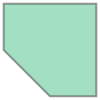

In [23]:
result1 = split(geom1, line)
result2 = split(geom2, line)
result2[1]


In [27]:
print(type(result1))
result1.geoms[0].area

<class 'shapely.geometry.collection.GeometryCollection'>


3.5

In [32]:
if result1.geoms[0].area > result1.geoms[1].area:
    p1 = result1.geoms[0]
    print(p1)
else:
    p1 = result1.geoms[1]
    print(p1)
    
if result2.geoms[0].area > result2.geoms[1].area:
    p2 = result2.geoms[0]
    print(p1)
else:
    p2 = result2.geoms[1]
    print(p2)

POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 2 1))
POLYGON ((1 2, 1 3, 3 3, 3 1, 2 1, 1 2))


<AxesSubplot:>

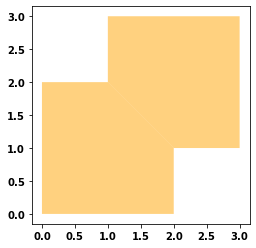

In [33]:
polys3 = geopandas.GeoSeries([p1,p2])
df3 = geopandas.GeoDataFrame({'geometry': polys3, 'df3':[1,2]})
df3.plot(color='orange', alpha = 0.5)

In [35]:
import pyodbc


#set up SQL connection

conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};' 
                      'Server=NE-SQL-CL1-03.kf-ext.com;' 
                      'Trusted_Connection=yes;')
cursor = conn.cursor()



In [62]:
patchSQL = ''' SELECT [OfficeCode]
      ,[Prcnt]
      ,[BoundaryType]
      ,[Geom].STAsBinary() as geometry
  FROM [GeoData].[dbo].[KFTop80PrcnBoundaries220815]
  where BoundaryType = 'All Sales incl shared' and Prcnt = 80
  and [OfficeCode] in ('NGH' ,'KEN') '''

patch = gpd.GeoDataFrame.from_postgis(patchSQL,conn, geom_col = 'geometry', crs="EPSG:4326") 

C:\Users\CULLEYJ\Anaconda3\envs\geo_env\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:>

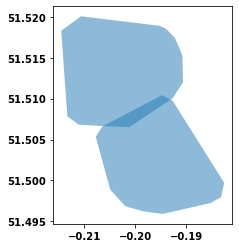

In [40]:
patch.plot(alpha = 0.5)

In [63]:
patch_geom1 = patch.geometry[0]
patch_geom2 = patch.geometry[1]

patch_points = patch_geom1.boundary.intersection(patch_geom2.boundary) # multipoint
#points = list(points) # point list

print(patch_points)

MULTIPOINT (-0.206246170105167 51.506640796758134, -0.1930134115752617 51.50988415382329)


C:\Users\CULLEYJ\AppData\Local\Temp\ipykernel_28060\781174459.py:1: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  patchline = LineString(patch_points)
C:\Users\CULLEYJ\Anaconda3\envs\geo_env\lib\site-packages\shapely\geometry\linestring.py:46: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ret = geos_linestring_from_py(coordinates)


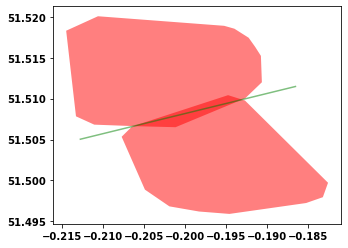

In [64]:
patchline = LineString(patch_points)
patchline_ext = scale(patchline, xfact=2.0, yfact=2.0, origin='center')

df_point = gpd.GeoDataFrame({'geometry': patch_points, 'df_point':[1,2]})
df_line = gpd.GeoDataFrame({'geometry': patchline_ext, 'df_linet':[1]})

ax = patch.plot(color='red', alpha = 0.5)
df_line.plot(ax=ax, color='green', alpha=0.5);

In [65]:
patchline = LineString(patch_points)
patchline_ext = scale(patchline, xfact=2.0, yfact=2.0, origin='center')

patch_result1 = split(patch_geom1, patchline_ext)
patch_result2 = split(patch_geom2, patchline_ext)
print(len(patch_result1.geoms), len(patch_result2.geoms))



2 2


C:\Users\CULLEYJ\AppData\Local\Temp\ipykernel_28060\2427514844.py:1: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  patchline = LineString(patch_points)
C:\Users\CULLEYJ\Anaconda3\envs\geo_env\lib\site-packages\shapely\geometry\linestring.py:46: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ret = geos_linestring_from_py(coordinates)


POLYGON ((-0.2062461701051647 51.506640796758134, -0.21107529 51.50682016, -0.2133083939552307 51.507835388183594, -0.214509 51.5183, -0.2106239944696426 51.52006912231445, -0.1952 51.5189, -0.1939492970705032 51.51854705810547, -0.1922058016061783 51.51744079589844, -0.1914125 51.516326, -0.1907082051038742 51.51522445678711, -0.1905909031629562 51.512001037597656, -0.1926283985376358 51.51004409790039, -0.1930134115752708 51.50988415382329, -0.2062461701051647 51.506640796758134))


<AxesSubplot:>

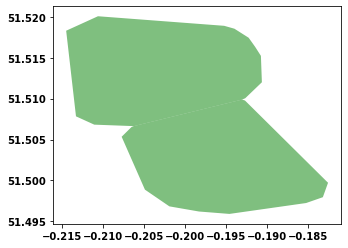

In [61]:
if patch_result1.geoms[0].area > patch_result1.geoms[1].area:
    pp1 = patch_result1.geoms[0]
else:
    pp1 = patch_result1.geoms[1]
    
if patch_result2.geoms[0].area > patch_result2.geoms[1].area:
    pp2 = patch_result2.geoms[0]
else:
    pp2 = patch_result2.geoms[1]
    print(pp2)
    
polys = geopandas.GeoSeries([pp1,pp2])
df4 = geopandas.GeoDataFrame({'geometry': polys, 'df4':[1,2]})
df4.plot(color='green', alpha = 0.5)   